In [1]:
# adding essential libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# to remove warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# copying dataset to avoid data loss 
df = data.copy()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Exploring Data 

In [4]:
print('Size of dataset : {}'.format(df.shape))

Size of dataset : (14999, 10)


In [5]:
columns = df.columns
print('Column names : {}'.format(columns))

Column names : Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [6]:
# checking data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# checking null values 
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
# finding unique values in each column
# reason of doing this -> if any column has only unique point like ID or Roll number , then we should drop it 

def unique_values(column_name):
    unique_value_count = df[column_name].nunique()
    return unique_value_count

In [9]:
dict_unique_value_in_column = {}
for each_column in columns:
    unique_cnt = unique_values(each_column)
    dict_unique_value_in_column[each_column] = unique_cnt

for each_item in dict_unique_value_in_column.items():
    print(each_item)

('satisfaction_level', 92)
('last_evaluation', 65)
('number_project', 6)
('average_montly_hours', 215)
('time_spend_company', 8)
('Work_accident', 2)
('left', 2)
('promotion_last_5years', 2)
('Department', 10)
('salary', 3)


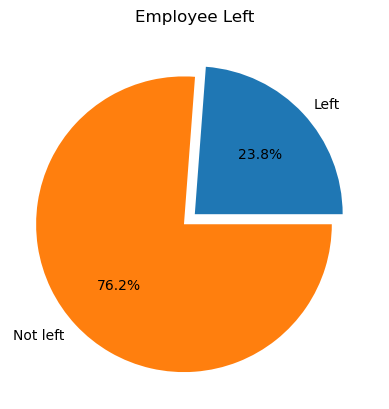

In [10]:
work_array_2 = np.array(df['left'])

left = work_array_2[work_array_2==1].shape[0]
retained = work_array_2[work_array_2==0].shape[0]
combined = [left,retained]
labels = ['Left','Not left']


plt.title("Employee Left")
plt.pie(combined,labels=labels,autopct="%0.1f%%",explode=[0,0.1])
plt.show()

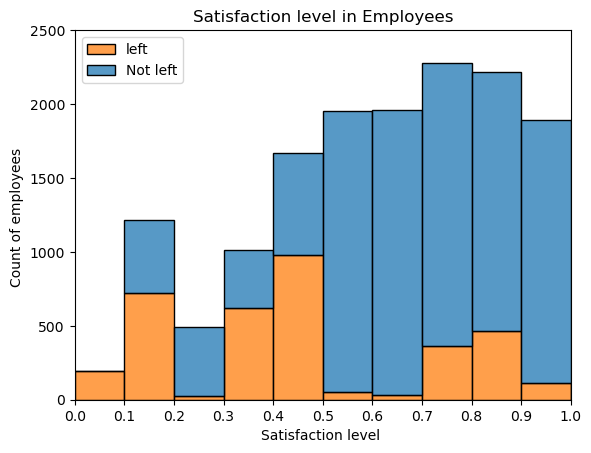

In [11]:
sns.histplot(data = df,x = 'satisfaction_level',bins = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1],hue = "left",multiple="stack")
plt.axis([0,1,0,2500])
arr = np.arange(0,1.1,0.1)
plt.xticks(arr)
plt.title("Satisfaction level in Employees")
plt.xlabel("Satisfaction level ")
plt.ylabel("Count of employees ")
labels = ['left','Not left']
plt.legend(labels = labels)

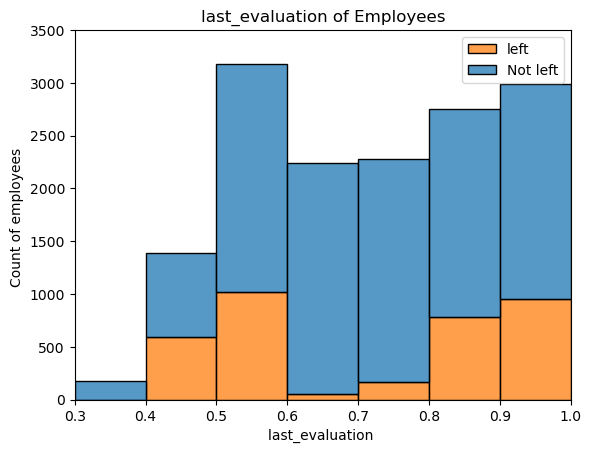

In [12]:
sns.histplot(data = df,x = 'last_evaluation',bins = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],hue="left",multiple="stack")
plt.axis([0.3,1,0,3500])
arr = np.arange(0.3,1.1,0.1)
plt.xticks(arr)
plt.title("last_evaluation of Employees")
plt.xlabel("last_evaluation ")
plt.ylabel("Count of employees ")
labels = ['left','Not left']
plt.legend(labels = labels)

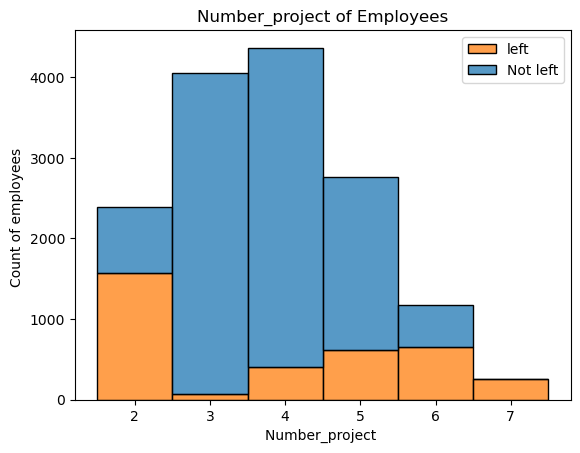

In [13]:
sns.histplot(data = df,x = 'number_project',discrete = True,hue = "left",multiple="stack")
plt.title("Number_project of Employees")
plt.xlabel("Number_project ")
plt.ylabel("Count of employees ")
labels = ['left','Not left']
plt.legend(labels = labels)

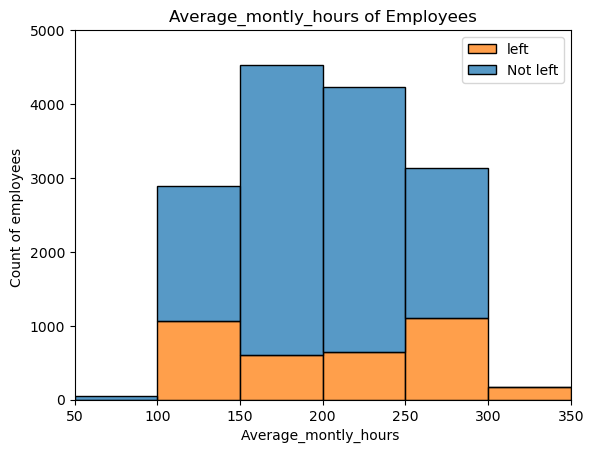

In [14]:
sns.histplot(data = df,x = 'average_montly_hours',bins = [0,50,100,150,200,250,300,350],hue="left",multiple="stack")
plt.title("Average_montly_hours of Employees")
plt.axis([50,350,0,5000])
plt.xlabel("Average_montly_hours ")
plt.ylabel("Count of employees ")
labels = ['left','Not left']
plt.legend(labels = labels)

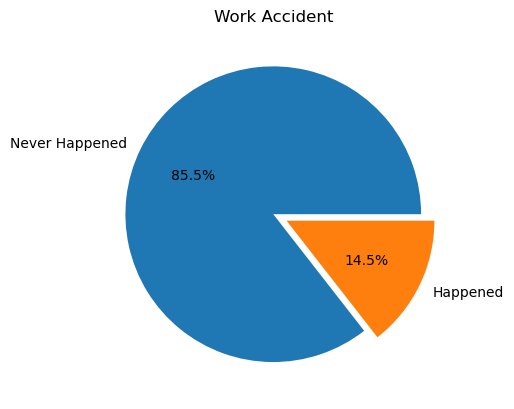

In [15]:
work_array = np.array(df['Work_accident'])
zeros = work_array[work_array==0].shape[0]
ones = work_array[work_array==1].shape[0]
pie_array = [zeros,ones]
labels = ['Never Happened','Happened']
plt.title("Work Accident")
plt.pie(pie_array,labels = labels,autopct="%0.1f%%",explode = [0,0.1])
plt.show()

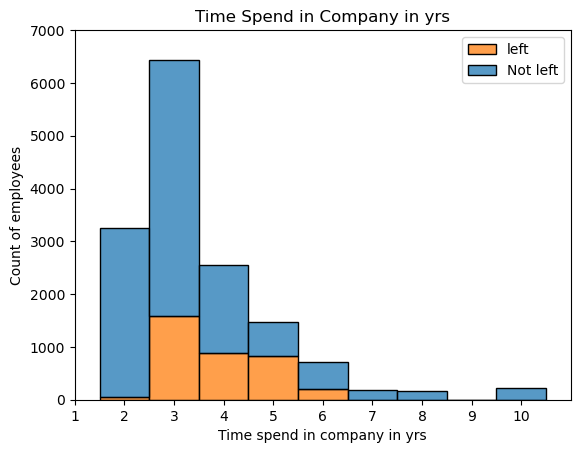

In [16]:
sns.histplot(data = df , x = 'time_spend_company',discrete = True,hue="left",multiple="stack")
arr = np.arange(0,11,1)
plt.xticks(arr)
plt.axis([1,11,0,7000])
plt.title("Time Spend in Company in yrs")
plt.xlabel("Time spend in company in yrs")
plt.ylabel("Count of employees")
labels = ['left','Not left']
plt.legend(labels = labels)

Text(0, 0.5, 'Count of employees')

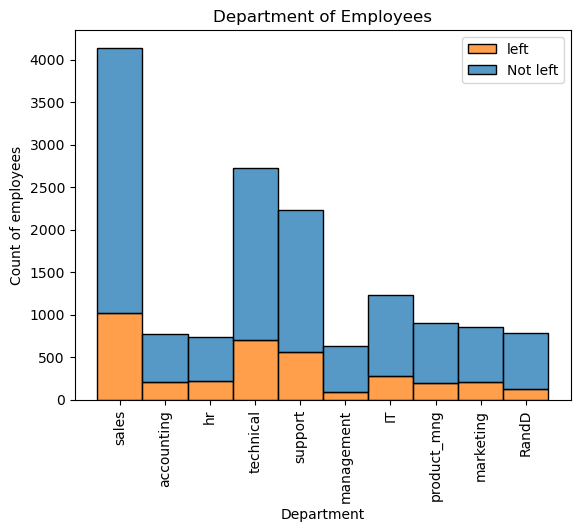

In [17]:
myplot = sns.histplot(data = df , x = 'Department',discrete = True,hue = "left",multiple="stack")
myplot.set_xticklabels(myplot.get_xticklabels(),rotation=90)
labels = ['left','Not left']
plt.legend(labels = labels)
plt.title("Department of Employees")
plt.xlabel("Department")
plt.ylabel("Count of employees")

Text(0, 0.5, 'Count of employees')

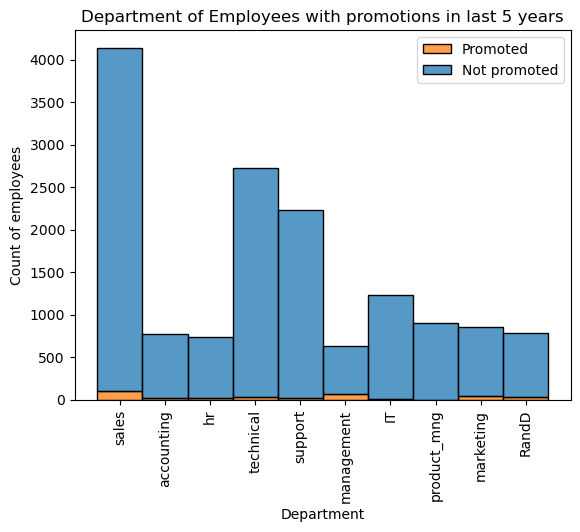

In [18]:
myplot = sns.histplot(data = df , x = 'Department',discrete = True,hue = "promotion_last_5years",multiple="stack")
myplot.set_xticklabels(myplot.get_xticklabels(),rotation=90)
labels = ['Promoted','Not promoted']
plt.legend(labels = labels)
plt.title("Department of Employees with promotions in last 5 years")
plt.xlabel("Department")
plt.ylabel("Count of employees")

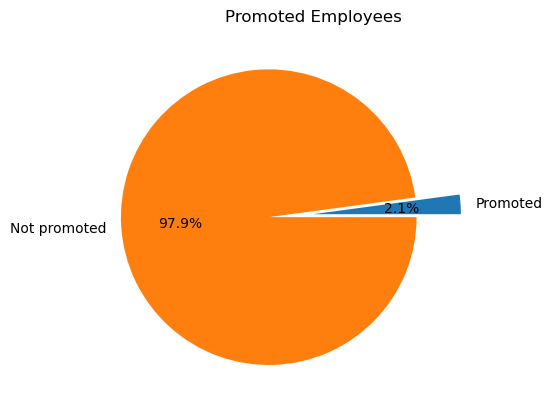

In [19]:
work_array_3 = np.array(df['promotion_last_5years'])

promoted = work_array_3[work_array_3==1].shape[0]
not_promoted = work_array_3[work_array_3==0].shape[0]
combined = [promoted,not_promoted]
labels = ['Promoted','Not promoted']


plt.title("Promoted Employees")
plt.pie(combined,labels=labels,autopct="%0.1f%%",explode=[0,0.3])
plt.show()

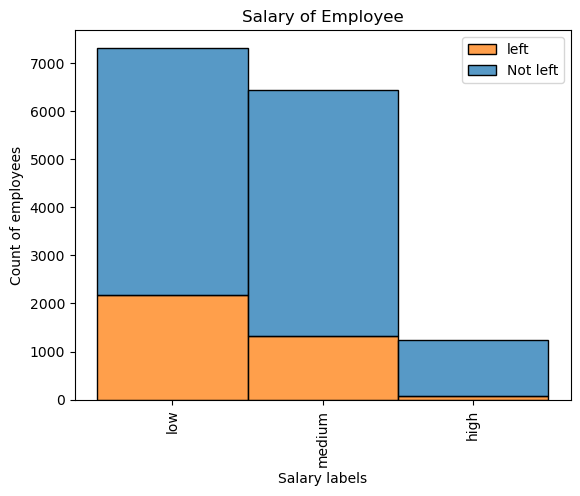

In [20]:
myplot = sns.histplot(data = df , x = 'salary',discrete = True,hue="left",multiple = "stack")
myplot.set_xticklabels(myplot.get_xticklabels(),rotation=90)
plt.title("Salary of Employee")
plt.xlabel("Salary labels")
plt.ylabel("Count of employees")
labels = ['left','Not left']
plt.legend(labels = labels)

# Exploratory Data Analysis Findings Report: HR Data Analysis

Introduction:
The following report presents key findings from an exploratory data analysis conducted on employee data within the company. The aim was to uncover patterns and trends that may contribute to employee attrition.

1. **Overall Employee Attrition**:
Approximately 23.8% of employees have left the company, signaling a noteworthy attrition rate.

2. **Employee Satisfaction Impact**:
A significant correlation between employee satisfaction and attrition is observed. About 69.4% of employees with a satisfaction level greater than or equal to 0.5 remain, while those with satisfaction levels below 0.5 are more likely to leave.

3. **Last Evaluation Scores**:
Employees with last evaluation scores within the ranges of (0.4 - 0.6) and (0.8 - 1.0) exhibit higher attrition rates, highlighting a potential connection between performance evaluations and employee retention.

4. **Project Involvement**:
All employees involved in 7 projects have left the company. Additionally, a considerable number of departures are observed among those with 2 projects, and a significant proportion of employees with 4, 5, and 6 projects also left.

5. **Average Monthly Hours**:
Approximately 30% of employees working between 100 - 150 and 250 - 300 hours monthly have left the company. Notably, attrition is also observed in the range of 150 - 250 average monthly hours.

6. **Work Accidents**:
Around 14.5% of the total employees experienced work accidents.

7. **Years of Experience (YOE)**:
A majority of employees with Years of Experience between 3 - 6 have left the company, indicating a potential trend related to mid-career attrition.

8. **Departmental Analysis**:
Predominantly, employees from the Sales, Technical, Support, and IT departments exhibit attrition rates ranging from 20% to 30%.

9. **Promotion Rates**:
Only 2.1% of employees have been promoted in last 5 years, highlighting a significant gap in promotional opportunities within the organization and almost none of the employee from department like accounting , HR , Support , IT and product management have been promoted in last 5 year 

10. **Salary Levels**:
The majority of employees receive low salaries, followed by those in the medium salary category. A smaller percentage, approximately 1200-1500 employees, receive high salaries.

# Conclusion:
Major reason for leaving the company : No promotion in last 5 year and high working hours 
. So if company provides proper promotion to the employees and reduce the working hours that can lead to less attirition 

# Feature Engineering 

In [21]:
# One hot encoding for Categorical features 
df.drop("Department",axis=1,inplace=True)
one_hot_encoded_data = pd.get_dummies(df, columns = ['salary'])
one_hot_encoded_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0


<Axes: >

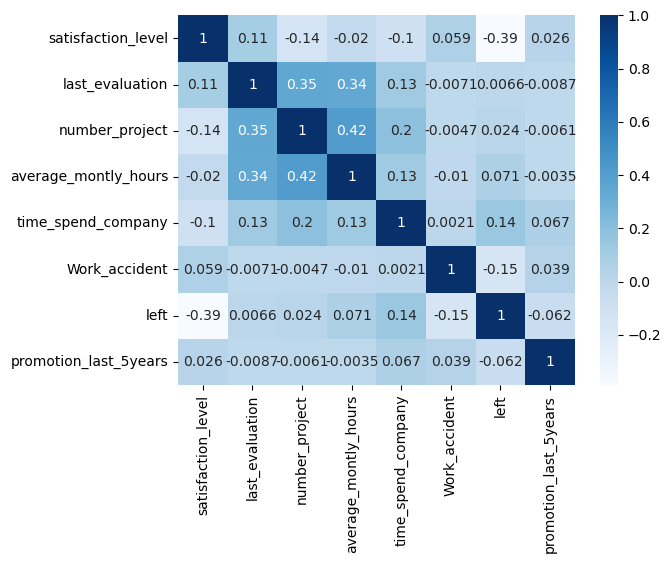

In [22]:
# to find out the correlated features 

corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='Blues',annot=True)

# Train test split and feature scaling

In [23]:
# Seprating training data and testing data

X = one_hot_encoded_data.drop('left',axis=1)
y = one_hot_encoded_data['left']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling 

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 65.52%


In [29]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1853 1057]
 [ 236  604]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.64      0.74      2910
           1       0.36      0.72      0.48       840

    accuracy                           0.66      3750
   macro avg       0.63      0.68      0.61      3750
weighted avg       0.77      0.66      0.68      3750



# Hyperparameter tuning in week 7 , will definitely come to this and imporve this 